In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np
import json
import itertools

In [3]:
def load_json(path):
    with open(path,'r') as f:
        out=json.load(f)
    return out

In [4]:
def split_dir(out_dir_lst):
    ft_dirs=[]
    pre_dirs=[]
    for dir_ in out_dir_lst:
        if 'ft' in dir_:
            ft_dirs.append(dir_)
        else:
            pre_dirs.append(dir_)
    return ft_dirs,pre_dirs

def sort_dir(_dirs):
    dir_version=[int(dir_[-1]) for dir_ in _dirs] 
    return list(np.array(_dirs)[np.argsort(dir_version)])

In [5]:
def process_dir(out_dir_lst):
    ft_dirs,pre_dirs=split_dir(out_dir_lst)
    sorted_dirs_lst=[]
    for dirs in [pre_dirs,ft_dirs]:
        sorted_dirs_lst+=sort_dir(dirs)
    return sorted_dirs_lst

In [7]:
def load_json(path):
    with open(path,'rb') as f:
        out=json.load(f)
    return out

In [63]:
source=Path('/redresearch1/hlai/detectron2')
mode='4'
mode_lst=['4']
metrics_name_lst=['total_loss','bbox/AP']
title_name_lst=['Total Training Loss','Validation Average Precision']
metrics_fname_lst=['tr_metrics_dict.json','val_result_dict.json']


____________________mode: 3__________________________
obtaining the best Total Training Loss:0.0671232099775807 at iteration 5275


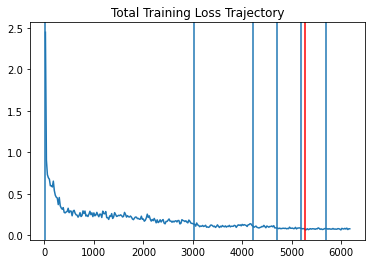

obtaining the best Validation Average Precision :79.46405703179991 at iteration 5699


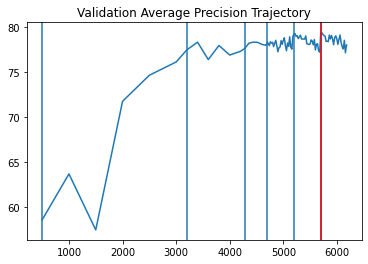

In [65]:

for mode in mode_lst:
    print(f'____________________mode: {mode}__________________________')
    out_dir_lst=[f for f in os.listdir(source) if 'mode'+mode in f and f!='x101_mode'+mode and 'eval' not in f and 'v' in f and  'rand' not in f]
    sorted_dirs_lst=process_dir(out_dir_lst)

#     sorted_dirs_lst=sorted_dirs_lst[0]
    for metrics_name,metrics_fname,title_name in zip(metrics_name_lst,metrics_fname_lst,title_name_lst):
#         metrics_name,metrics_fname,title_name =next(iter(zip(metrics_name_lst,metrics_fname_lst,title_name_lst)))

        metrics_lst_full=[]
        iter_lst_full=[]
        iter_marker_lst=[]
        for i in range(len(sorted_dirs_lst)):
            out_dir=source/sorted_dirs_lst[i]
            metrics_path=out_dir/metrics_fname
            metrics_dict=load_json(metrics_path.as_posix())
            metrics_lst=metrics_dict[metrics_name]
#             print(metrics_path)
            iter_arr=np.array(metrics_dict['iteration'])
            if i!=0:
                last_iter=iter_lst_full[i-1][-1]
            else:
                last_iter=0

            iter_arr+=last_iter
            iter_marker_lst.append(iter_arr[0])

            metrics_lst_full+=metrics_lst
            iter_lst_full.append(list(iter_arr))

            

        iter_lst_full=list(itertools.chain(*iter_lst_full))
        
        if 'AP' in metrics_name:
            max_idx=np.argmax(metrics_lst_full)
            best_iter=iter_lst_full[max_idx]
            print(f'obtaining the best {title_name} :{max(metrics_lst_full)} at iteration {best_iter}')
        elif 'loss' in metrics_name:
            min_idx=np.argmin(metrics_lst_full)
            best_iter=iter_lst_full[min_idx]
            print(f'obtaining the best {title_name}:{min(metrics_lst_full)} at iteration {best_iter}')
        else:
            pass
        plt.plot(iter_lst_full,metrics_lst_full)
        for iter_marker in iter_marker_lst:
            plt.axvline(iter_marker)
        plt.axvline(best_iter,c='red')
        plt.title(f'{title_name} Trajectory')
        plt.show()

